In [1]:
# All modules that  is needed.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   

import rubin_sim.maf as maf
from rubin_sim.maf.maps import dustMap
from rubin_sim.photUtils import Dust_values

from rubin_sim.


from PulsatingStarRecovery import PulsatingStarRecovery

In [2]:
from rubin_sim.data import get_baseline

opsim_fname = get_baseline()
print(opsim_fname)

runName = os.path.split(opsim_fname)[-1].replace('.db', '')
print(runName)

/sims_maf/rubin_sim_data/sim_baseline/baseline_v2.0_10yrs.db
baseline_v2.0_10yrs


In [3]:
# Connect to the database so we can use it with MAF.
opsim_db = maf.OpsimDatabase(opsim_fname)



In [4]:
# Specify ra / dec of the point we want to work with on the sky - in degrees. 
# (these can be lists, if you want to work on multiple, limited points on the sky)
test_ra = 0.0
test_dec = -20.0
test_slicer = maf.UserPointsSlicer(test_ra, test_dec)
maps = ['DustMap']



In [5]:
#parameters to run the metrics
filename='./RRc.csv'
dmod=18.5
sigmaFORnoise=1
do_remove_saturated=True
factorForDimensionGap=0.5
numberOfHarmonics=3
factorForDimensionGap=0.5

In [6]:
mymetric = PulsatingStarRecovery(filename,dmod,sigmaFORnoise,do_remove_saturated,numberOfHarmonics,factorForDimensionGap)

./RRc.csv


In [7]:
# Define a sqlconstraint, if we need to just use a (large) subset of the opsim visits
#sqlconstraint = None   # no constraint, make all visits available

# Examples of other potentially useful sqlconstraints:
# sqlconstraint = 'filter = "r"'  # just select the visits in a particular filter
# sqlconstraint = 'note not like "%DD%"'  # don't choose any of the DD field visits
sqlconstraint = 'night < 365'  # only use visits in the first year of the survey


In [8]:
bundle = maf.MetricBundle(mymetric, test_slicer, sqlconstraint,maps)

Querying database observations with constraint night < 365 for columns ['filter', 'numExposures', 'rotSkyPos', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD', 'skyBrightness', 'fieldRA', 'seeingFwhmEff', 'night', 'airmass', 'visitExposureTime']
Found 215980 visits
Running:  ['PulsatingStarRecovery']
Useful (at all S/N and NOT saturated)  Nvisits in ugrizy bands
3 4 9 13 15 17


/data0/sw.tmpfs/lsst_stack-2021.10.13/anaconda3/lib/python3.8/site-packages/gatspy/periodic/lomb_scargle_fast.py:445: UserWarning: The score() method defaults to a slower O[N^2] algorithm.
Use the score_frequency_grid() method to access the fast FFT-based algorithm.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("The score() method defaults to a slower O[N^2] "


Noise level (median vs mean)
0.12554857155203059 0.16751115702348637
Finding optimal frequency:
 - Estimated peak width = 0.0175
 - Using 5 steps per peak; omega_step = 0.00349
 - User-specified period range:  0.19 to 0.58
 - Computing periods at 6256 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
 Period of the model:
0.38351388888888893
 Period found by Gatpy:
0.38354910467665876
 DeltaP/P (in perc):
3.52157877698267e-05
 DeltaP/P*1/number of cycle:
9.787667514015797e-08
fitting...
fitting r band
fitting i band
fitting z band
fitting y band
Completed metric generation.
Running reduce methods.


/home/jail/dlusers/dicrisci/GruppoMAF/CADENCENOTE/CADENCENOTE_userfriendly/GITHUB/MAF_SCOC/PulsatingStarRecovery.py:192: RuntimeWarning: divide by zero encountered in log10
  result=(-2.5)*np.log10(sum(flux)/len(flux))


Running summary statistics.
Completed.


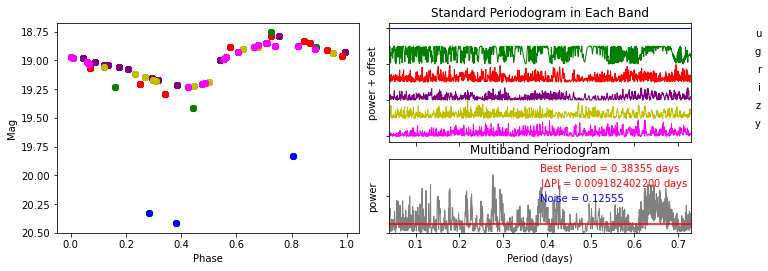

In [9]:
# Pass the bundle (along with any other bundles to be run on this opsim) to a MetricBundleGroup in order to
# calculate the metric bundle values.
g = maf.MetricBundleGroup({'PulsatingStarRecovery': bundle}, opsim_db, outDir='./', resultsDb=None)
# And calculate the metric
g.runAll()

In [14]:
bundle.metricValues.data[0]




{'n_u': 3,
 'n_g': 4,
 'n_r': 9,
 'n_i': 13,
 'n_z': 15,
 'n_y': 17,
 'maxGap_u': 0.47809111348193767,
 'maxGap_g': 0.2827806128178736,
 'maxGap_r': 0.23553552550265522,
 'maxGap_i': 0.2398388669304401,
 'maxGap_z': 0.268468384668453,
 'maxGap_y': 0.35819340845182523,
 'numberGaps_u': 1,
 'numberGaps_g': 3,
 'numberGaps_r': 3,
 'numberGaps_i': 3,
 'numberGaps_z': 3,
 'numberGaps_y': 1,
 'uniformity_u': 1.2174923750594515,
 'uniformity_g': 1.0850499149729174,
 'uniformity_r': 0.9966888346008844,
 'uniformity_i': 1,
 'uniformity_z': 1,
 'uniformity_y': 1,
 'uniformityKS_u': 0.56718044584439,
 'uniformityKS_g': 0.2720875486646719,
 'uniformityKS_r': 0.1841572818052697,
 'uniformityKS_i': 0.397193910093377,
 'uniformityKS_z': 0.2274055464067487,
 'uniformityKS_y': 0.19932293021801184,
 'P_gatpsy': 0.38354910467665876,
 'Delta_Period': 3.52157877698267e-05,
 'Delta_Period_abs': 0.009182402199788223,
 'Delta_Period_abs_cicli': 9.787667514015797e-08,
 'deltamag_u': -inf,
 'deltamag_g': -inf,


In [11]:
g.bundleDict.keys()


dict_keys(['PulsatingStarRecovery', 'PulsatingStarRecovery_Delta_Period', 'PulsatingStarRecovery_Delta_Period_abs_cicli', 'PulsatingStarRecovery_P_gatpsy', 'PulsatingStarRecovery_deltaamp_r', 'PulsatingStarRecovery_deltamag_r'])

In [12]:
bundle.metricValues

masked_array(data=[{'n_u': 3, 'n_g': 4, 'n_r': 9, 'n_i': 13, 'n_z': 15, 'n_y': 17, 'maxGap_u': 0.47809111348193767, 'maxGap_g': 0.2827806128178736, 'maxGap_r': 0.23553552550265522, 'maxGap_i': 0.2398388669304401, 'maxGap_z': 0.268468384668453, 'maxGap_y': 0.35819340845182523, 'numberGaps_u': 1, 'numberGaps_g': 3, 'numberGaps_r': 3, 'numberGaps_i': 3, 'numberGaps_z': 3, 'numberGaps_y': 1, 'uniformity_u': 1.2174923750594515, 'uniformity_g': 1.0850499149729174, 'uniformity_r': 0.9966888346008844, 'uniformity_i': 1, 'uniformity_z': 1, 'uniformity_y': 1, 'uniformityKS_u': 0.56718044584439, 'uniformityKS_g': 0.2720875486646719, 'uniformityKS_r': 0.1841572818052697, 'uniformityKS_i': 0.397193910093377, 'uniformityKS_z': 0.2274055464067487, 'uniformityKS_y': 0.19932293021801184, 'P_gatpsy': 0.38354910467665876, 'Delta_Period': 3.52157877698267e-05, 'Delta_Period_abs': 0.009182402199788223, 'Delta_Period_abs_cicli': 9.787667514015797e-08, 'deltamag_u': -inf, 'deltamag_g': -inf, 'deltamag_r': 0.

In [70]:


# g.simData is the simulation visit data that the previous MetricBundleGroup queried from the database
g.simData[0:2]



array([(18.43226727, 22.3705568 , 62.75077469, 1.17253421, 60218.00180556, 30., 0, 2, -60.81292802, 'y', 0.74862578, 310.0244801 ),
       (18.41642254, 22.33832685, 61.08425006, 1.20704594, 60218.00225414, 30., 0, 2, -63.56142457, 'y', 0.76176979, 310.60187065)],
      dtype=(numpy.record, [('skyBrightness', '<f8'), ('fiveSigmaDepth', '<f8'), ('rotSkyPos', '<f8'), ('airmass', '<f8'), ('observationStartMJD', '<f8'), ('visitExposureTime', '<f8'), ('night', '<i8'), ('numExposures', '<i8'), ('fieldDec', '<f8'), ('filter', '<U256'), ('seeingFwhmEff', '<f8'), ('fieldRA', '<f8')]))

Plotting figures with "night < 365" constraint now.


/data0/sw/lsst_stack-2021.10.13/rubin_sim/rubin_sim/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
/data0/sw/lsst_stack-2021.10.13/rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:352: UserWarning: Histogram range was single-valued; expanding default range.
  warnings.warn('Histogram range was single-valued; expanding default range.')
/data0/sw/lsst_stack-2021.10.13/rubin_sim/rubin_sim/maf/utils/mafUtils.py:97: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/data0/sw/lsst_stack-2021.10.13/rubin_sim/rubin_sim/maf/utils/mafUtils.py:105: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn('Optimal bin calculation calculated NaN: returning %i' %(nbinMax))
/data0/sw/lsst_stack-2021.10.13/rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:352: UserWarning: Histogram range was single-valued; expa

Plotting complete.


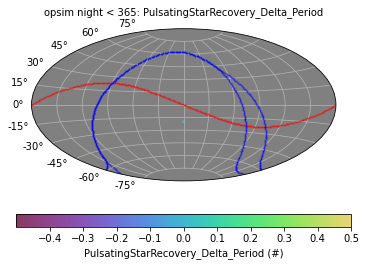

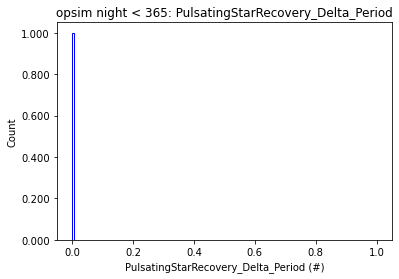

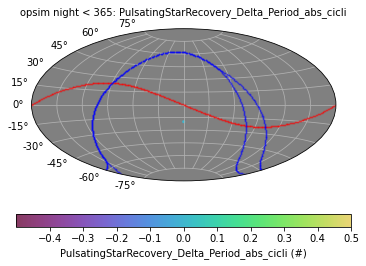

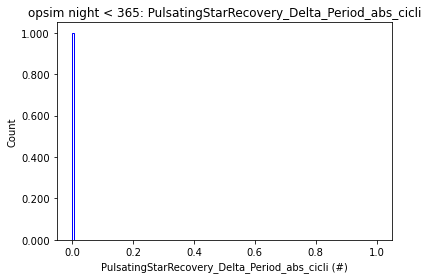

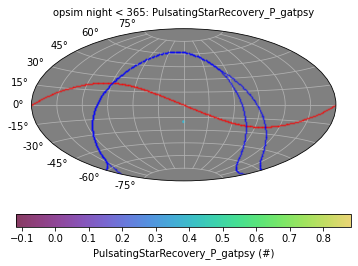

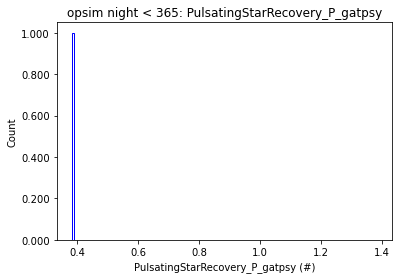

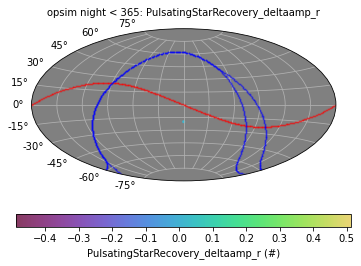

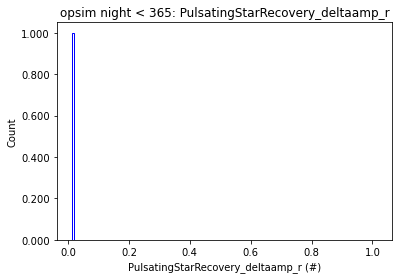

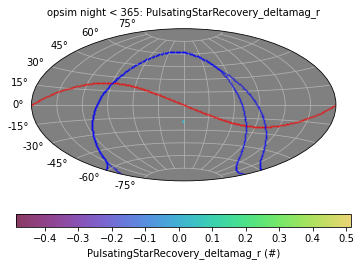

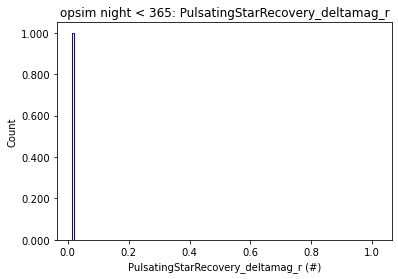

In [15]:
g.plotAll(closefigs=False)


In [13]:
#Turning complex metrics into scalars with "reduce" functions


'\nTurning complex metrics into scalars with "reduce" functions\n'